# Mandatory 3
By Carlos Reiakvam

In [127]:
import mandatory_asignments.mandatory3.aco.aco_functions as aco
from random import choices
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Import data

In [128]:
with open('graph.json','r') as f:
    graph = json.load(f)

In [129]:
# graph without weights
gg = {k: {e: w['weight'] for e, w in v.items()} for k, v in graph.items()}

#### 2&3: Let ants travel through node 0 and 29 at random, and keep store of paths

In [131]:
def ant(current_node='0', goal='29'):
    path, n_set = [], set()
    while True:
        if current_node == goal:
            return path + [current_node]
        nodes, weights = zip(*[(k, v) for k, v in gg[current_node].items()])

        # current choice
        ch = choices(nodes, weights)[0]

        # avoid ant mill
        if ch not in n_set:
            path.append(current_node)
            n_set.add(current_node)
            current_node = ch
        else:
            return None

#### 4: Update pheromone matrix according to the path and its travel cost


In [132]:
def update_pheromone_matrix(n_ants):
    ant_paths = [ant() for _ in range(n_ants)]
    pher_n = 10

    for ap in ant_paths:
        path_cost = 0

        for i in range(len(ap) - 1):
            path_cost += gg[ap[i]][ap[i + 1]]

        pher_to_deposit = pher_n / path_cost

        for i in range(len(ap) - 1):
            pher_g[ap[i]][ap[i + 1]] += pher_to_deposit

In [133]:
def ant_cost(best_path):
    ant_cost = 0
    for i in range(len(best_path) - 1):
        ant_cost += gg[best_path[i]][best_path[i + 1]]
    return ant_cost

In [139]:
pher_g = {k: {e: 1.0 for e, w in v.items()} for k, v in gg.items()}
n_ants = 3000
update_pheromone_matrix(n_ants)

i, max_pher, best_path = 0, 0, []

# choose path with most pheromones
while i < len(pher_g):
    best_path.append(str(i))

    # ant wants edge with the largest pheromone
    max_pher = max(pher_g[str(i)], key=pher_g[str(i)].get)

    i = int(max_pher) # iterates to next node
    if i == len(pher_g) - 1: # if i == 29; append and break
        best_path.append(str(i))
        break

print("Number of ants: ", n_ants)
print("Ant path:      ", best_path, " cost: ", ant_cost(best_path))

Number of ants:  3000
Ant path:       ['0', '1', '5', '6', '9', '10', '12', '15', '16', '18', '20', '25', '27', '29']  cost:  0.35216869792433475


#### Step 5: Visualize the results

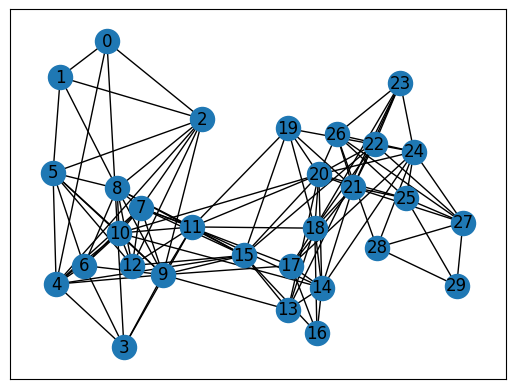

In [137]:
G = nx.from_dict_of_dicts(graph)
# labels = [str(i) for i in range(1,30)]
# nx.set_node_attributes(G, labels, "labels")
dijkstra_p = nx.dijkstra_path(G, '0', '29', weight='weight')

# G.add_nodes_from(labels)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

In [138]:
# path = 0
# for i in range(len(dijkstra_p) - 1):
#     path += gg[dijkstra_p[i]][dijkstra_p[i + 1]]